In [1]:
import numpy as np
import xarray as xr
from compute_anomaly.compute_anomalies import anomaly

In [2]:
anomaly?

Signature: anomaly(data, nHarm)
Docstring:
Compute anomaly by subtracting smoothed climatology from the input data.

Parameters:
    data (xarray.DataArray): Input data array with dimensions ('time', 'lat', 'lon').
    nHarm (int): Number of harmonic modes to retain for smoothing climatology.
    
Returns:
    xarray.DataArray: Anomaly data array.
File:      ~/anaconda3v2/envs/package_test_env/lib/python3.9/site-packages/compute_anomaly/compute_anomalies.py
Type:      function

In [3]:
# 6-hourly precipitation data
fili1 = '/media/athul/DATA/data_work_pc_kit/IMERG_v7_remapped/tropics_imerg_v07_6_hourly_mean_1.0deg_2000_2023.nc'

f1 = xr.open_dataset(fili1)
f1

<xarray.Dataset>
Dimensions:        (lon: 360, lat: 61, time: 33600)
Coordinates:
  * lon            (lon) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * lat            (lat) float64 -30.0 -29.0 -28.0 -27.0 ... 27.0 28.0 29.0 30.0
  * time           (time) datetime64[ns] 2000-06-01 ... 2023-05-31T18:00:00
Data variables:
    precipitation  (time, lon, lat) float32 ...
Attributes:
    CDI:                             Climate Data Interface version 1.9.9rc1 ...
    Conventions:                     CF-1.6
    history:                         Wed Dec 06 10:14:26 2023: cdo -shifttime...
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/07;\nDOIauth...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    CDO:                             Climate Data Operators version 1.9.9rc1 ...

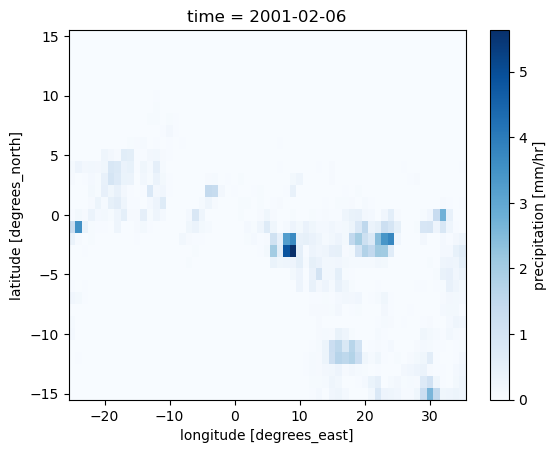

In [8]:
nHarm = 3 # number of harmonics to be removed from raw_data
precip_6h_raw = f1.precipitation.sel(lat=slice(-15,15), lon=slice(-25,35)).transpose('time','lat','lon') # raw_six-hourly precipitation data

precip_6h_raw[1000,...].plot(cmap='Blues')

CPU times: user 11.8 s, sys: 1.14 s, total: 12.9 s
Wall time: 12.9 s


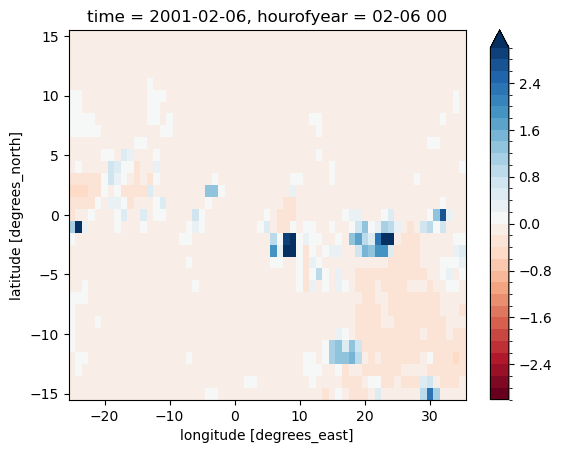

In [11]:
%%time

# compute anomaly by removing the first 3 (nHarm) harmonics from the raw data
precip_anom_6h = anomaly(data=precip_6h_raw, nHarm=nHarm)
precip_anom_6h[1000,...].plot(cmap='RdBu', levels=np.linspace(-3,3,31))